In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#read the csv file
df=pd.read_csv("/content/student_scores.csv")

In [ ]:
#check the first 5 rows of the df
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#build a ML Model so it can predict scores based on hours of study
df.shape

(25, 2)

In [ ]:
#get the summary of overall data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#check for the outliers
IQR=df['Hours'].quantile(0.75)-df['Hours'].quantile(0.25)
IQR

np.float64(4.7)

In [ ]:
#check for the upper limit and lower limit
upper_threshold=df['Hours'].quantile(0.2375)+(1.5*IQR)    # Q3+1.5(IQR)
lower_threshold=df['Hours'].quantile(0.25)-(1.5*IQR)         # Q1-1.5(IQR)
print("upper limit:",upper_threshold)
print("lower limit:",lower_threshold)

upper limit: 10.05
lower limit: -4.3500000000000005


-->values greater than q3+1.5IQR-->there is outliers

-->values less than q1-1.5IQR-->outliers

No skew in the data

In [ ]:
#check for the null values
df.isnull().sum()

In [ ]:
#check for the duplicates data
df.duplicated().sum()

In [ ]:
#drop the duplictes
df.drop_duplicates()

In [ ]:
#check the data types
df.dtypes

Median and Mean are closure to each other there is less skew in the data

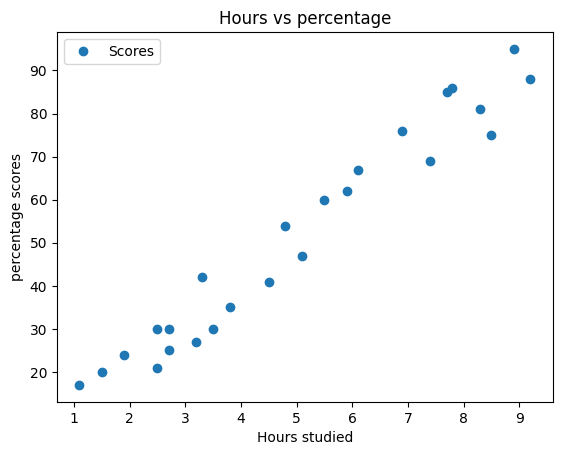

In [ ]:
df.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs percentage")
plt.xlabel("Hours studied")
plt.ylabel("percentage scores")
plt.show()

1.Is there any relationship between features and  target-->yes

2.do we require any transformation-->no

In [ ]:
df.corr()  #corrlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


-->There is linear relationship between the target and feature hours and score

-->we can go ahead and develop a linear regression model.No transformation
required

In [ ]:
#check the values in scores column
df['Scores'].values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

Split the data

In [ ]:
a=[1,2,3,4]
a[0:2]
a[:-2]

[1, 2]

In [ ]:
X=df.loc[:,['Hours']].values   #Note:-take features in 2D data
Y=df.loc[:,'Scores'].values  #Note:-take target in 1D data

In [ ]:
print(X,Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Scaling is not mandatory for linear regression

In [ ]:
#split the data into x_train and x_test,y_train and y_test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=45)
print(X_train)
print(X_test)

[[7.4]
 [3.2]
 [6.1]
 [4.5]
 [5.5]
 [8.3]
 [9.2]
 [2.7]
 [1.5]
 [1.1]
 [5.1]
 [8.9]
 [3.5]
 [6.9]
 [4.8]
 [2.5]
 [8.5]
 [5.9]]
[[2.5]
 [2.7]
 [3.3]
 [7.7]
 [1.9]
 [7.8]
 [3.8]]


MODELLING

In [ ]:
#MODEL FOR ALGORITHM IS-->SCORE=(M*HOURS)+C

In [ ]:
from sklearn.linear_model import LinearRegression
#initialize the model
regressor=LinearRegression()
#fit the model
regressor.fit(X_train,Y_train) #all the magic happens in the step-->learning happens here-->GD gives the final values of m & c


LinearRegression()

In [ ]:
#find the value of "c" -->intercept value
print(regressor.intercept_)

1.431512900311212


In [ ]:
#find the value of "m"-->coeffiecient value
print(regressor.coef_)

[9.72000803]


Pearls of extrapolation

In [ ]:
regressor.predict([[6]])

array([59.75156109])

In [ ]:
y_pred=regressor.predict(X_test)
y_pred

array([25.73153298, 27.67553458, 33.5075394 , 76.27557474, 19.89952816,
       77.24757554, 38.36754342])

In [ ]:
df2=pd.DataFrame({'Actual':Y_test,'predict':y_pred})
df2

,Actual,predict
0,30,25.731533
1,30,27.675535
2,42,33.507539
3,85,76.275575
4,24,19.899528
5,86,77.247576
6,35,38.367543


Evaluate the moel

In [ ]:
from sklearn import metrics
print("R2_SCORE:",metrics.r2_score(Y_test,y_pred))


R2_SCORE: 0.9347551352640703
